In [1]:
import sklearn
print("Scikit-learn : {}".format(sklearn.__version__))

import scikitplot as skplt 
print("Scikit-plot version : {}".format(skplt.__version__))

import joblib
print("Joblib version: {}".format(joblib.__version__))

import matplotlib.pyplot as plt

Scikit-learn : 1.4.1.post1
Scikit-plot version : 0.3.7
Joblib version: 1.3.2


#### 1.Load Data

In [2]:
from sklearn import datasets
news_groups = datasets.fetch_20newsgroups()


In [3]:
news_groups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
news_groups = datasets.fetch_20newsgroups(
    categories=[
        "alt.atheism",
        "comp.graphics",
        "rec.autos",
        "sci.electronics",
        "talk.politics.guns",
    ]
)
news_groups.target_names

['alt.atheism',
 'comp.graphics',
 'rec.autos',
 'sci.electronics',
 'talk.politics.guns']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(news_groups.data, news_groups.target, test_size=.2, random_state=123)

print(len(X_train), len(X_test), len(y_train), len(y_test))

2236 559 2236 559


#### 2. Vectorize Data

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50_000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape 

((2236, 38096), (559, 38096))

#### 3. Train Model

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_classif = RandomForestClassifier()

rf_classif.fit(X_train_vec, y_train)


RandomForestClassifier()

#### 4. Make Prediction

In [16]:
y_pred_train = rf_classif.predict(X_train_vec)

print(y_train[:5])
print(y_pred_train[:5])

[0 1 4 3 0]
[0 1 4 3 0]


In [17]:
y_pred_test = rf_classif.predict(X_test_vec)

print(y_test[:5])
print(y_pred_test[:5])

[2 4 3 0 4]
[2 4 3 0 4]


#### 5. Evaluate ML Metrics

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_test)))
print("Train Accuracy: {:.2f}".format(accuracy_score(y_train, y_pred_train)))

print("\nConfusion Matrix :")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred_test, target_names=news_groups.target_names))

Test Accuracy: 0.92
Train Accuracy: 1.00

Confusion Matrix :
[[ 88   1   1   2   0]
 [  0 119   2   1   0]
 [  0   5 113   4   2]
 [  0  12   4  97   0]
 [  1   1   5   3  98]]

Classification Report: 
                    precision    recall  f1-score   support

       alt.atheism       0.99      0.96      0.97        92
     comp.graphics       0.86      0.98      0.92       122
         rec.autos       0.90      0.91      0.91       124
   sci.electronics       0.91      0.86      0.88       113
talk.politics.guns       0.98      0.91      0.94       108

          accuracy                           0.92       559
         macro avg       0.93      0.92      0.92       559
      weighted avg       0.92      0.92      0.92       559



<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

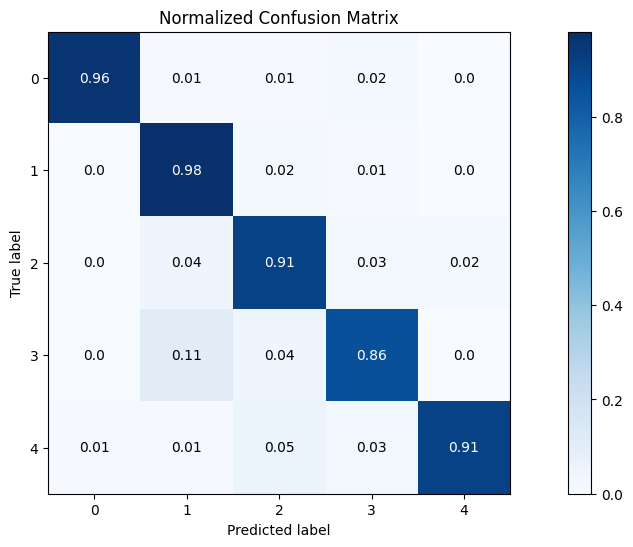

In [21]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(111)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, ax = ax1, normalize=True)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

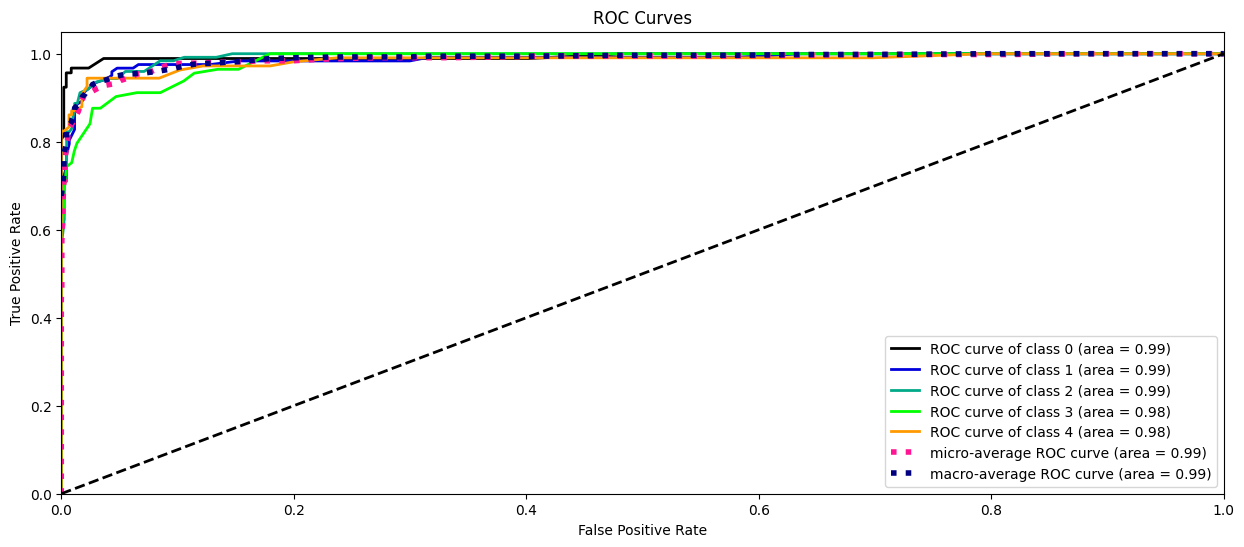

In [23]:
y_test_probs = rf_classif.predict_proba(X_test_vec)
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(111)
skplt.metrics.plot_roc(y_test, y_test_probs, ax = ax1)

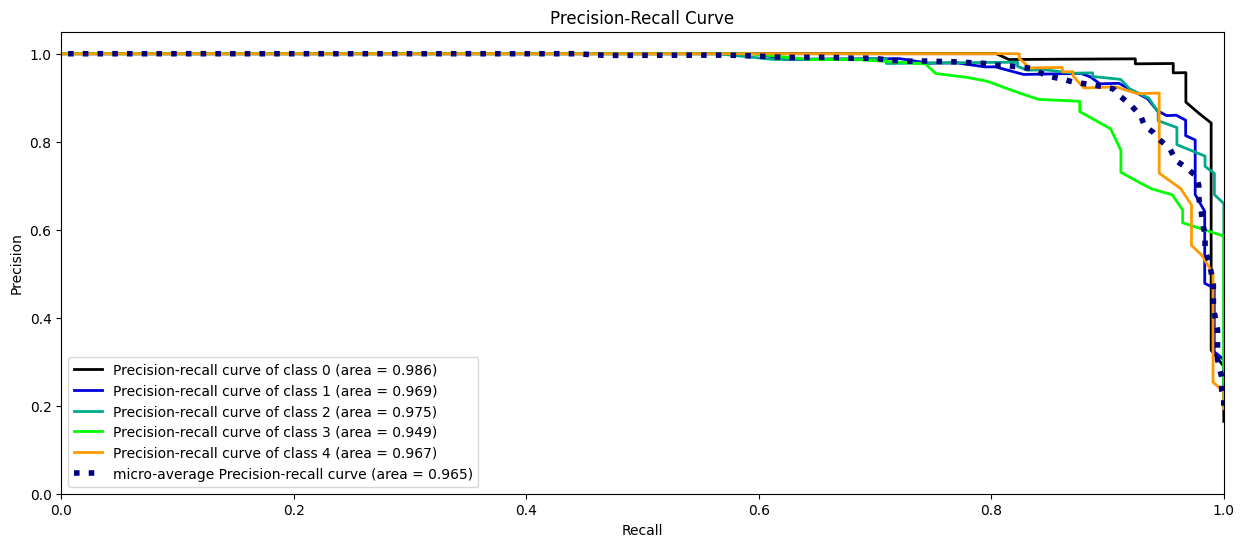

In [25]:
y_test_probs = rf_classif.predict_proba(X_test_vec)
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(111)
skplt.metrics.plot_precision_recall(y_test, y_test_probs, ax=ax1);

#### 6. Model Persistence

In [26]:
from joblib import load, dump

dump(rf_classif, "rf_classif.model")

['rf_classif.model']

In [27]:
rf_classif_2 = load("rf_classif.model")
rf_classif_2

RandomForestClassifier()

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred_train = rf_classif_2.predict(X_train_vec)
y_pred_test= rf_classif_2.predict(X_test_vec)

print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_test)))
print("Train Accuracy: {:.2f}".format(accuracy_score(y_train, y_pred_train)))

print("\nConfusion Matrix :")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred_test, target_names=news_groups.target_names))

Test Accuracy: 0.92
Train Accuracy: 1.00

Confusion Matrix :
[[ 88   1   1   2   0]
 [  0 119   2   1   0]
 [  0   5 113   4   2]
 [  0  12   4  97   0]
 [  1   1   5   3  98]]

Classification Report: 
                    precision    recall  f1-score   support

       alt.atheism       0.99      0.96      0.97        92
     comp.graphics       0.86      0.98      0.92       122
         rec.autos       0.90      0.91      0.91       124
   sci.electronics       0.91      0.86      0.88       113
talk.politics.guns       0.98      0.91      0.94       108

          accuracy                           0.92       559
         macro avg       0.93      0.92      0.92       559
      weighted avg       0.92      0.92      0.92       559

